In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler , MinMaxScaler, StandardScaler
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input,Flatten,Conv1D,MaxPooling1D
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

## Classifier Without Imbalanced Technique

In [2]:
df= pd.read_csv('Heart Disease Data 2015.csv')
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
df.drop(['Income',"Education",'DiffWalk',"NoDocbcCost","AnyHealthcare",'Veggies',"Fruits","CholCheck"],axis=1,inplace=True)
df.shape
df['HeartDiseaseorAttack'].value_counts()


HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   BMI                   253680 non-null  float64
 4   Smoker                253680 non-null  float64
 5   Stroke                253680 non-null  float64
 6   Diabetes              253680 non-null  float64
 7   PhysActivity          253680 non-null  float64
 8   HvyAlcoholConsump     253680 non-null  float64
 9   GenHlth               253680 non-null  float64
 10  MentHlth              253680 non-null  float64
 11  PhysHlth              253680 non-null  float64
 12  Sex                   253680 non-null  float64
 13  Age                   253680 non-null  float64
dtypes: float64(14)
memory usage: 27.1 MB


In [5]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [6]:
x = df.drop(["HeartDiseaseorAttack"] , axis = 1).values
y = df["HeartDiseaseorAttack"].values

In [7]:
x_train , x_test , y_train ,y_test = train_test_split(x,y , test_size= 0.25 , random_state= 42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

118374 118374
39459 39459


## scalar

In [8]:

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

118374 118374
39459 39459


## Randomforest

In [9]:



# Inicjalizacja modelu z domyślnymi parametrami
rf = RandomForestClassifier()

# Określenie siatki parametrów do przetestowania
param_grid = {
    'n_estimators': [100, 200, 300],  # Liczba drzew
    'max_depth': [10, 20, 30],        # Maksymalna głębokość drzewa
    'min_samples_split': [2, 4, 6],   # Minimalna liczba próbek wymagana do podziału węzła
    'min_samples_leaf': [1, 2, 4],    # Minimalna liczba próbek wymagana w liściu
    'max_features': ['auto', 'sqrt']  # Liczba cech do rozważenia przy każdym podziale
}

# Utworzenie obiektu GridSearchCV
cv_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Przeszukiwanie siatki parametrów
cv_rf.fit(x_train, y_train)

# Najlepszy zestaw parametrów
print("Najlepsze parametry: ", cv_rf.best_params_)

# Najlepszy estimator
best_rf = cv_rf.best_estimator_

# Predykcje i ocena modelu
ypred_train = best_rf.predict(x_train)
ypred_test = best_rf.predict(x_test)

print("Training Results\n")
print(classification_report(y_train, ypred_train))
print("Test Results\n")
print(classification_report(y_test, ypred_test))

# Macierz pomyłek
conf_matrix = confusion_matrix(y_test, ypred_test)
print("Confusion Matrix:\n", conf_matrix)

# Ocena modelu za pomocą walidacji krzyżowej
cross_val_scores = cross_val_score(best_rf, x_train, y_train, cv=5)
print("Cross-validation scores:", cross_val_scores)
print("Average cross-validation score:", np.mean(cross_val_scores))

Najlepsze parametry:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 200}
Training Results

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93    102339
         1.0       0.78      0.08      0.15     16035

    accuracy                           0.87    118374
   macro avg       0.83      0.54      0.54    118374
weighted avg       0.86      0.87      0.82    118374

Test Results

              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93     34073
         1.0       0.61      0.06      0.10      5386

    accuracy                           0.87     39459
   macro avg       0.74      0.53      0.52     39459
weighted avg       0.83      0.87      0.82     39459

Confusion Matrix:
 [[33875   198]
 [ 5081   305]]
Cross-validation scores: [0.86707497 0.8675396  0.86732841 0.86817318 0.86668919]
Average cross-validation score: 0.867361070236071


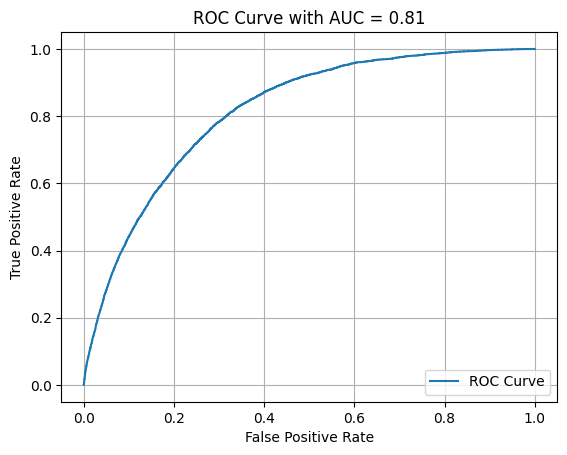

In [10]:



y_proba_test = best_rf.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## DECISION TREE CLASSIFIER

In [11]:


# Parametry do przetestowania w Grid Search
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

# Utworzenie modelu drzewa decyzyjnego
tree = DecisionTreeClassifier()

# Uruchomienie Grid Search z walidacją krzyżową
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Wyświetlenie najlepszych parametrów i wyników
print("Najlepsze parametry:", grid_search.best_params_)
print("Najlepsza dokładność:", grid_search.best_score_)

# Utworzenie i ocena modelu z najlepszymi parametrami
best_tree = grid_search.best_estimator_
best_tree.fit(x_train, y_train)

ypred_train2 = best_tree.predict(x_train)
ypred_test2 = best_tree.predict(x_test)

# Ocena modelu na zbiorze testowym

print("Training Results\n")
print(classification_report(y_train, ypred_train2))
print('Testing Results\n')
print(classification_report(y_test, ypred_test2))

# Dodatkowo: Walidacja krzyżowa dla najlepszego modelu na całym zbiorze danych
cross_val_scores = cross_val_score(best_tree, x_train, y_train, cv=5)
print("Cross-Validation Scores for the Best Model:", cross_val_scores)
print("Average Cross-Validation Score:", cross_val_scores.mean())

Najlepsze parametry: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Najlepsza dokładność: 0.8667021451805897
Training Results

              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93    102339
         1.0       0.57      0.07      0.12     16035

    accuracy                           0.87    118374
   macro avg       0.72      0.53      0.53    118374
weighted avg       0.83      0.87      0.82    118374

Testing Results

              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93     34073
         1.0       0.59      0.07      0.12      5386

    accuracy                           0.87     39459
   macro avg       0.73      0.53      0.53     39459
weighted avg       0.83      0.87      0.82     39459

Cross-Validation Scores for the Best Model: [0.86711721 0.86656811 0.86686378 0.86652587 0.86643575]
Average Cross-Validation Score: 0.8667021451805897


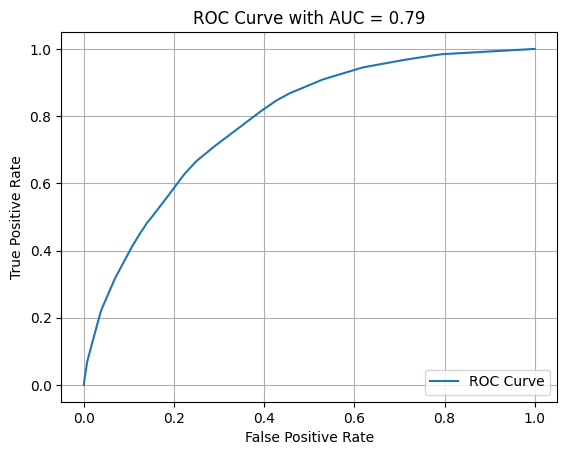

In [12]:



y_proba_test = best_tree.predict_proba(x_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Naive Bayes

In [13]:
Gnb = GaussianNB()
Gnb.fit(x_train, y_train)
ypred_train3 = Gnb.predict(x_train)
y_pred_test3 = Gnb.predict(x_test)

print("Naive Bayes Classifier Accuracy: ",accuracy_score(y_test, y_pred_test3))

Naive Bayes Classifier Accuracy:  0.8132745381281837


In [14]:
print("Training Results\n")
print(classification_report(y_train, ypred_train3))

Training Results

              precision    recall  f1-score   support

         0.0       0.91      0.87      0.89    102339
         1.0       0.35      0.43      0.38     16035

    accuracy                           0.81    118374
   macro avg       0.63      0.65      0.64    118374
weighted avg       0.83      0.81      0.82    118374



In [15]:
print('Testing Results\n')
print(classification_report(y_test, y_pred_test3))

Testing Results

              precision    recall  f1-score   support

         0.0       0.91      0.87      0.89     34073
         1.0       0.35      0.44      0.39      5386

    accuracy                           0.81     39459
   macro avg       0.63      0.66      0.64     39459
weighted avg       0.83      0.81      0.82     39459



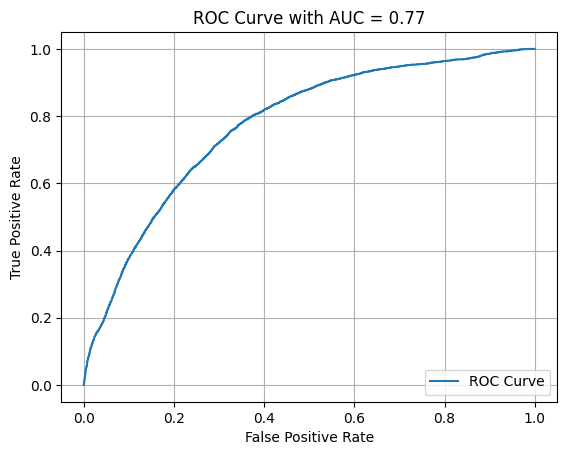

In [16]:



y_proba_test = Gnb.predict_proba(x_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## XGBOSST

Najlepsze parametry:  {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Accuracy on Training set:  0.868594454863399
Accuracy on Test set:  0.8664689931321118

Training Results

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93    102339
         1.0       0.59      0.10      0.17     16035

    accuracy                           0.87    118374
   macro avg       0.73      0.55      0.55    118374
weighted avg       0.84      0.87      0.83    118374

Testing Results

              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93     34073
         1.0       0.56      0.10      0.17      5386

    accuracy                           0.87     39459
   macro avg       0.72      0.54      0.55     39459
weighted avg       0.83      0.87      0.82     39459



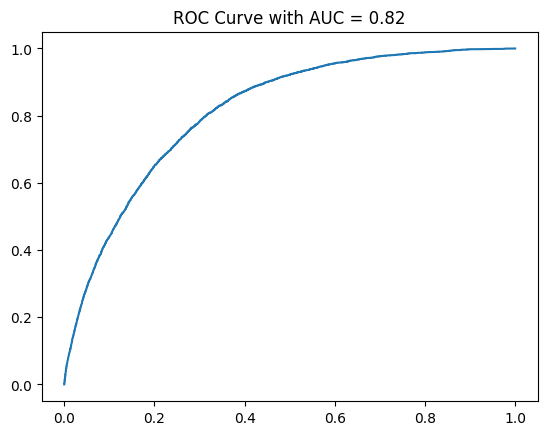

In [17]:



# Inicjalizacja modelu XGBoost
xg = XGBClassifier()

# Definiowanie siatki hiperparametrów do przetestowania
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Utworzenie obiektu GridSearchCV
grid_search = GridSearchCV(estimator=xg, param_grid=param_grid, cv=3, scoring='accuracy')

# Przeszukiwanie siatki parametrów
grid_search.fit(x_train, y_train)

# Najlepsze parametry i najlepszy model
print("Najlepsze parametry: ", grid_search.best_params_)
best_xg = grid_search.best_estimator_

# Predykcje na zbiorze treningowym i testowym
ypred_train4 = best_xg.predict(x_train)
y_pred_test4 = best_xg.predict(x_test)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train, ypred_train4))
print("Accuracy on Test set: ", accuracy_score(y_test, y_pred_test4))
print("\nTraining Results\n")
print(classification_report(y_train, ypred_train4))
print('Testing Results\n')
print(classification_report(y_test, y_pred_test4))

# Krzywa ROC
y_proba_test4 = best_xg.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba_test4)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test, y_proba_test4)))
plt.show()

## logistic regression

Najlepsze parametry:  {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy on Training set:  0.8672259110953419
Accuracy on Test set:  0.8672039331964825

Training Results

              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93    102339
         1.0       0.58      0.08      0.13     16035

    accuracy                           0.87    118374
   macro avg       0.72      0.53      0.53    118374
weighted avg       0.83      0.87      0.82    118374

Testing Results

              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93     34073
         1.0       0.60      0.08      0.14      5386

    accuracy                           0.87     39459
   macro avg       0.74      0.54      0.54     39459
weighted avg       0.84      0.87      0.82     39459



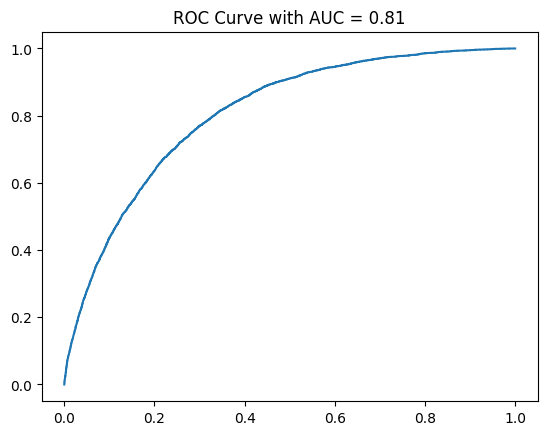

In [18]:




# Inicjalizacja modelu regresji logistycznej
lg = LogisticRegression()

# Definiowanie siatki hiperparametrów do przetestowania
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Parametr regularyzacji
    'penalty': ['l1', 'l2'],       # Typ regularyzacji
    'solver': ['liblinear']        # Algorytm optymalizacji (liblinear jest dobrym wyborem dla małych zbiorów danych)
}

# Utworzenie obiektu GridSearchCV
grid_search = GridSearchCV(estimator=lg, param_grid=param_grid, cv=5, scoring='accuracy')

# Przeszukiwanie siatki parametrów
grid_search.fit(x_train, y_train)

# Najlepsze parametry i najlepszy model
print("Najlepsze parametry: ", grid_search.best_params_)
best_lg = grid_search.best_estimator_

# Predykcje na zbiorze treningowym i testowym
ypred_train4 = best_lg.predict(x_train)
y_pred_test4 = best_lg.predict(x_test)
# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train, ypred_train4))
print("Accuracy on Test set: ", accuracy_score(y_test, y_pred_test4))
print("\nTraining Results\n")
print(classification_report(y_train, ypred_train4))
print('Testing Results\n')
print(classification_report(y_test, y_pred_test4))

# Krzywa ROC
y_proba_test4 = best_lg.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba_test4)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test, y_proba_test4)))
plt.show()

## GradientBoostingClassifier

Najlepsze parametry:  {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy on Training set:  0.8686620372716982
Accuracy on Test set:  0.8665703641754733

Training Results

              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93    102339
         1.0       0.65      0.07      0.12     16035

    accuracy                           0.87    118374
   macro avg       0.76      0.53      0.53    118374
weighted avg       0.84      0.87      0.82    118374

Testing Results

              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93     34073
         1.0       0.60      0.06      0.12      5386

    accuracy                           0.87     39459
   macro avg       0.74      0.53      0.52     39459
weighted avg       0.83      0.87      0.82     39459



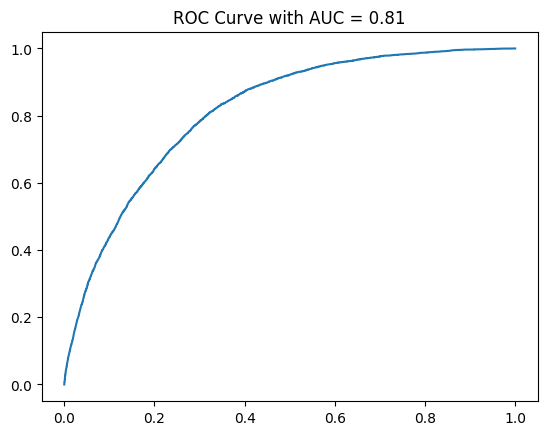

In [19]:



# Inicjalizacja modelu Gradient Boosting Classifier
gb = GradientBoostingClassifier()

# Definiowanie siatki hiperparametrów do przetestowania
param_grid = {
    'n_estimators': [100, 200, 300],  # Liczba drzew w ensemble
    'learning_rate': [0.01, 0.1, 0.2], # Szybkość uczenia
    'max_depth': [3, 5, 7],            # Maksymalna głębokość drzewa
    'min_samples_split': [2, 4],       # Minimalna liczba próbek wymagana do podziału węzła
    'min_samples_leaf': [1, 2]         # Minimalna liczba próbek w liściu
}

# Utworzenie obiektu GridSearchCV
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy')

# Przeszukiwanie siatki parametrów
grid_search.fit(x_train, y_train)

# Najlepsze parametry i najlepszy model
print("Najlepsze parametry: ", grid_search.best_params_)
best_gb = grid_search.best_estimator_

# Predykcje na zbiorze treningowym i testowym
ypred_train6 = best_gb.predict(x_train)
y_pred_test6 = best_gb.predict(x_test)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train, ypred_train6))
print("Accuracy on Test set: ", accuracy_score(y_test, y_pred_test6))
print("\nTraining Results\n")
print(classification_report(y_train, ypred_train6))
print('Testing Results\n')
print(classification_report(y_test, y_pred_test6))

# Krzywa ROC
y_proba_test6 = best_gb.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba_test6)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test, y_proba_test6)))
plt.show()

## KNN

In [20]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [21]:
grid_cv = GridSearchCV(KNeighborsClassifier(), 
                       param_grid={
                           "n_neighbors": range(1, 50)
                       }, cv=5, scoring="f1", 
                       verbose=1, n_jobs=6)


In [22]:
grid_cv.fit(x_train, 
            y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=6,
             param_grid={'n_neighbors': range(1, 50)}, scoring='f1', verbose=1)

In [23]:
grid_cv.best_score_


0.2524439512271498

In [24]:
knn = grid_cv.best_estimator_
knn

KNeighborsClassifier(n_neighbors=3)

In [25]:
ypred_train = grid_cv.predict(x_train)
y_pred_test = grid_cv.predict(x_test)
print("XGBClassifier Accuracy: ",accuracy_score(y_test, y_pred_test))

XGBClassifier Accuracy:  0.8310904989989609


In [26]:
print("Training Results\n")
print(classification_report(y_train, ypred_train))

Training Results

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94    102339
         1.0       0.70      0.44      0.54     16035

    accuracy                           0.90    118374
   macro avg       0.81      0.71      0.74    118374
weighted avg       0.89      0.90      0.89    118374



In [27]:
print('Testing Results\n')
print(classification_report(y_test, y_pred_test))

Testing Results

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90     34073
         1.0       0.32      0.21      0.25      5386

    accuracy                           0.83     39459
   macro avg       0.60      0.57      0.58     39459
weighted avg       0.80      0.83      0.82     39459



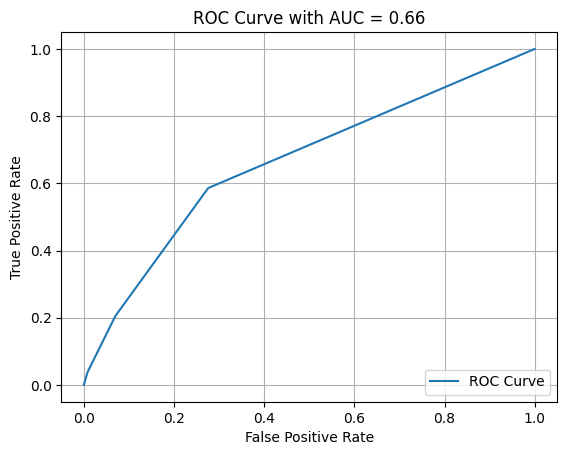

In [28]:



y_proba_test = grid_cv.predict_proba(x_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## SIECI NEURONOWE

## ANN

In [29]:
ann = tf.keras.models.Sequential()

In [30]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)


In [31]:
ann.add(tf.keras.layers.Dense(units=14, activation='relu'))

In [32]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [33]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [34]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [35]:
ann.fit(x_train, y_train, batch_size = 32, epochs=100,
          validation_data=(x_test, y_test), verbose=1,
          callbacks=[early_stop])

Epoch 1/100


3700/3700 [==============================] - 14s 3ms/step - loss: 0.3420 - accuracy: 0.8645 - val_loss: 0.3240 - val_accuracy: 0.8653
Epoch 2/100
3700/3700 [==============================] - 11s 3ms/step - loss: 0.3231 - accuracy: 0.8667 - val_loss: 0.3216 - val_accuracy: 0.8655
Epoch 3/100
3700/3700 [==============================] - 10s 3ms/step - loss: 0.3217 - accuracy: 0.8672 - val_loss: 0.3210 - val_accuracy: 0.8663
Epoch 4/100
3700/3700 [==============================] - 10s 3ms/step - loss: 0.3207 - accuracy: 0.8673 - val_loss: 0.3212 - val_accuracy: 0.8664
Epoch 5/100
3700/3700 [==============================] - 10s 3ms/step - loss: 0.3201 - accuracy: 0.8678 - val_loss: 0.3206 - val_accuracy: 0.8666
Epoch 6/100
3700/3700 [==============================] - 10s 3ms/step - loss: 0.3196 - accuracy: 0.8676 - val_loss: 0.3197 - val_accuracy: 0.8668
Epoch 7/100
3700/3700 [==============================] - 10s 3ms/step - loss: 0.3194 - accuracy: 0.8676 - val_loss: 0.3203

In [36]:
ypred_train6 = ann.predict(x_train)
y_pred_test6 = ann.predict(x_test)

y_pred_test6 = (y_pred_test6 > 0.5)
ypred_train6 = (ypred_train6 > 0.5)
print(np.concatenate((y_pred_test6.reshape(len(y_pred_test6),1), y_test.reshape(len(y_test),1)),1))

1234/1234 [==============================] - 2s 2ms/step
[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [37]:
accuracy_score(y_test, y_pred_test6)

0.8663929648495907

In [38]:
print("Training Results\n")
print(classification_report(y_train, ypred_train6))

Training Results

              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93    102339
         1.0       0.58      0.09      0.16     16035

    accuracy                           0.87    118374
   macro avg       0.73      0.54      0.54    118374
weighted avg       0.83      0.87      0.82    118374



In [39]:
print('Testing Results\n')
print(classification_report(y_test, y_pred_test6))

Testing Results

              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93     34073
         1.0       0.56      0.09      0.16      5386

    accuracy                           0.87     39459
   macro avg       0.72      0.54      0.54     39459
weighted avg       0.83      0.87      0.82     39459



In [ ]:


y_proba_test = ann.predict(x_test).flatten()


fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inna proba 

In [41]:


tf.random.set_seed(42)


model_22 = tf.keras.Sequential([
  tf.keras.layers.Dense(14,activation = 'relu'),
  tf.keras.layers.Dense(36,activation = 'relu'),
  tf.keras.layers.Dense(18,activation = 'relu'),
  tf.keras.layers.Dense(9,activation = 'relu'),
  tf.keras.layers.Dense(1,activation = 'sigmoid')                            
])


model_22.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])


history_2 = model_22.fit(x_train,y_train,epochs = 100)

Epoch 1/100
3700/3700 [==============================] - 12s 3ms/step - loss: 0.3357 - accuracy: 0.8647
Epoch 2/100
3700/3700 [==============================] - 9s 2ms/step - loss: 0.3223 - accuracy: 0.8668
Epoch 3/100
3700/3700 [==============================] - 9s 2ms/step - loss: 0.3205 - accuracy: 0.8674
Epoch 4/100
3700/3700 [==============================] - 9s 2ms/step - loss: 0.3195 - accuracy: 0.8673
Epoch 5/100
3700/3700 [==============================] - 9s 2ms/step - loss: 0.3185 - accuracy: 0.8674
Epoch 6/100
3700/3700 [==============================] - 9s 2ms/step - loss: 0.3182 - accuracy: 0.8671
Epoch 7/100
3700/3700 [==============================] - 9s 2ms/step - loss: 0.3176 - accuracy: 0.8673
Epoch 8/100
3700/3700 [==============================] - 9s 2ms/step - loss: 0.3171 - accuracy: 0.8671
Epoch 9/100
3700/3700 [==============================] - 9s 2ms/step - loss: 0.3170 - accuracy: 0.8675
Epoch 10/100
3700/3700 [==============================] - 9s 2ms/step - 

In [42]:
model_22.evaluate(x_test,y_test)

1234/1234 [==============================] - 3s 3ms/step - loss: 0.3193 - accuracy: 0.8665


[0.3192611634731293, 0.866494357585907]

In [43]:
ypred_train9 = model_22.predict(x_train)
y_pred_test9 = model_22.predict(x_test)

y_pred_test9 = (y_pred_test9 > 0.5)
ypred_train9 = (ypred_train9 > 0.5)

print(classification_report(y_train,ypred_train9))
print(classification_report(y_test,y_pred_test9))

1234/1234 [==============================] - 2s 2ms/step
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93    102339
         1.0       0.59      0.10      0.18     16035

    accuracy                           0.87    118374
   macro avg       0.73      0.55      0.55    118374
weighted avg       0.84      0.87      0.83    118374

              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93     34073
         1.0       0.56      0.10      0.17      5386

    accuracy                           0.87     39459
   macro avg       0.72      0.54      0.55     39459
weighted avg       0.83      0.87      0.82     39459



1234/1234 [==============================] - 3s 2ms/step


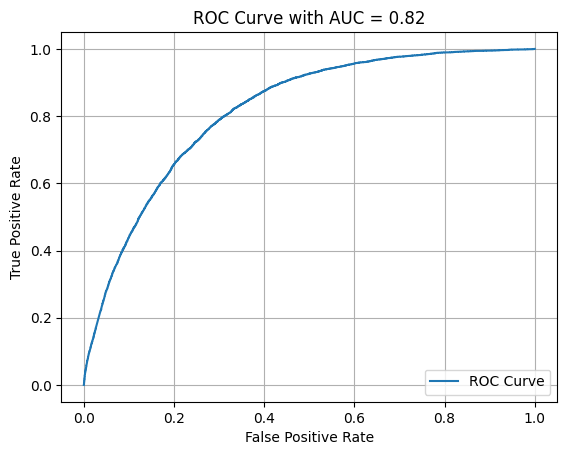

In [44]:


y_proba_test = model_22.predict(x_test).flatten()


fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inne próby sieci neuronowych 

In [45]:


tf.random.set_seed(42)


model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(14,activation = 'relu'),
  tf.keras.layers.Dense(6,activation = 'relu'),
  tf.keras.layers.Dense(6,activation = 'relu'),
  tf.keras.layers.Dense(1,activation = 'sigmoid')                            
])



model_2.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])



history_2 = model_2.fit(x_train,y_train,epochs = 100)

Epoch 1/100
3700/3700 [==============================] - 11s 3ms/step - loss: 0.3513 - accuracy: 0.8639
Epoch 2/100
3700/3700 [==============================] - 8s 2ms/step - loss: 0.3233 - accuracy: 0.8666
Epoch 3/100
3700/3700 [==============================] - 8s 2ms/step - loss: 0.3221 - accuracy: 0.8672
Epoch 4/100
3700/3700 [==============================] - 8s 2ms/step - loss: 0.3214 - accuracy: 0.8673
Epoch 5/100
3700/3700 [==============================] - 8s 2ms/step - loss: 0.3207 - accuracy: 0.8674
Epoch 6/100
3700/3700 [==============================] - 8s 2ms/step - loss: 0.3204 - accuracy: 0.8668
Epoch 7/100
3700/3700 [==============================] - 8s 2ms/step - loss: 0.3199 - accuracy: 0.8675
Epoch 8/100
3700/3700 [==============================] - 8s 2ms/step - loss: 0.3197 - accuracy: 0.8676
Epoch 9/100
3700/3700 [==============================] - 8s 2ms/step - loss: 0.3193 - accuracy: 0.8675
Epoch 10/100
3700/3700 [==============================] - 9s 2ms/step - 

In [46]:
model_2.evaluate(x_test,y_test)

1234/1234 [==============================] - 3s 2ms/step - loss: 0.3177 - accuracy: 0.8665


[0.3177141547203064, 0.866494357585907]

In [47]:
ypred_train9 = model_2.predict(x_train)
y_pred_test9 = model_2.predict(x_test)

y_pred_test9 = (y_pred_test9 > 0.5)
ypred_train9 = (ypred_train9 > 0.5)

print(classification_report(y_train,ypred_train9))
print(classification_report(y_test,y_pred_test9))

1234/1234 [==============================] - 2s 2ms/step
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93    102339
         1.0       0.58      0.10      0.17     16035

    accuracy                           0.87    118374
   macro avg       0.73      0.54      0.55    118374
weighted avg       0.84      0.87      0.83    118374

              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93     34073
         1.0       0.56      0.10      0.17      5386

    accuracy                           0.87     39459
   macro avg       0.72      0.54      0.55     39459
weighted avg       0.83      0.87      0.82     39459



1234/1234 [==============================] - 3s 2ms/step


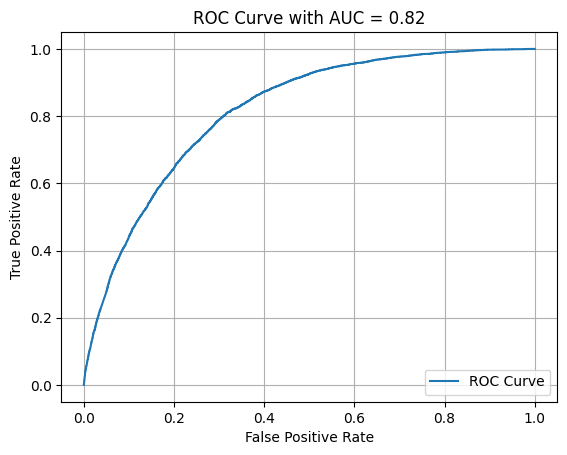

In [48]:

y_proba_test = model_2.predict(x_test).flatten()


fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inne próby sieci neuronowych 

In [49]:
model1 = Sequential()
model1.add(Dense(units=30,activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(units=15,activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(units=1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam')

In [50]:
model1.fit(x=x_train, 
          y=y_train, 
          epochs=100,
          validation_data=(x_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
3700/3700 [==============================] - 14s 4ms/step - loss: 0.3762 - val_loss: 0.3323
Epoch 2/100
3700/3700 [==============================] - 11s 3ms/step - loss: 0.3440 - val_loss: 0.3291
Epoch 3/100
3700/3700 [==============================] - 11s 3ms/step - loss: 0.3381 - val_loss: 0.3277
Epoch 4/100
3700/3700 [==============================] - 11s 3ms/step - loss: 0.3367 - val_loss: 0.3284
Epoch 5/100
3700/3700 [==============================] - 11s 3ms/step - loss: 0.3356 - val_loss: 0.3264
Epoch 6/100
3700/3700 [==============================] - 11s 3ms/step - loss: 0.3344 - val_loss: 0.3242
Epoch 7/100
3700/3700 [==============================] - 11s 3ms/step - loss: 0.3331 - val_loss: 0.3251
Epoch 8/100
3700/3700 [==============================] - 11s 3ms/step - loss: 0.3338 - val_loss: 0.3240
Epoch 9/100
3700/3700 [==============================] - 11s 3ms/step - loss: 0.3339 - val_loss: 0.3246
Epoch 10/100
3700/3700 [==============================] - 11s 3m

In [51]:
ypred_train11 = model1.predict(x_train)
y_pred_test11 = model1.predict(x_test)

y_pred_test11 = (y_pred_test11 > 0.5)
ypred_train11 = (ypred_train11 > 0.5)

print(classification_report(y_train,ypred_train11))
print(classification_report(y_test,y_pred_test11))

1234/1234 [==============================] - 2s 2ms/step
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93    102339
         1.0       0.75      0.00      0.01     16035

    accuracy                           0.86    118374
   macro avg       0.81      0.50      0.47    118374
weighted avg       0.85      0.86      0.80    118374

              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93     34073
         1.0       0.77      0.00      0.01      5386

    accuracy                           0.86     39459
   macro avg       0.82      0.50      0.47     39459
weighted avg       0.85      0.86      0.80     39459



1234/1234 [==============================] - 3s 2ms/step


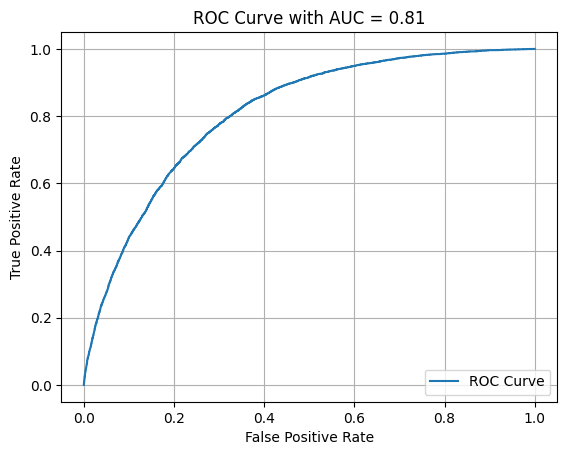

In [52]:

y_proba_test = model1.predict(x_test).flatten()


fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inny model

In [53]:
model12 = Sequential()


model12.add(Dense(14,  activation='relu'))
model12.add(Dropout(0.2))


model12.add(Dense(10, activation='relu'))
model12.add(Dropout(0.2))

model12.add(Dense(units=1,activation='sigmoid'))


model12.compile(loss='binary_crossentropy', optimizer='adam')

In [54]:
model12.fit(x=x_train, 
          y=y_train, 
          epochs=100,
          validation_data=(x_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
3700/3700 [==============================] - 14s 3ms/step - loss: 0.3784 - val_loss: 0.3302
Epoch 2/100
3700/3700 [==============================] - 11s 3ms/step - loss: 0.3385 - val_loss: 0.3263
Epoch 3/100
3700/3700 [==============================] - 11s 3ms/step - loss: 0.3338 - val_loss: 0.3256
Epoch 4/100
3700/3700 [==============================] - 11s 3ms/step - loss: 0.3325 - val_loss: 0.3262
Epoch 5/100
3700/3700 [==============================] - 11s 3ms/step - loss: 0.3311 - val_loss: 0.3260
Epoch 6/100
3700/3700 [==============================] - 11s 3ms/step - loss: 0.3308 - val_loss: 0.3241
Epoch 7/100
3700/3700 [==============================] - 11s 3ms/step - loss: 0.3301 - val_loss: 0.3234
Epoch 8/100
3700/3700 [==============================] - 11s 3ms/step - loss: 0.3307 - val_loss: 0.3242
Epoch 9/100
3700/3700 [==============================] - 11s 3ms/step - loss: 0.3307 - val_loss: 0.3238
Epoch 10/100
3700/3700 [==============================] - 11s 3m

In [55]:
ypred_train12 = model12.predict(x_train)
y_pred_test12 = model12.predict(x_test)

y_pred_test12 = (y_pred_test12 > 0.5)
ypred_train12 = (ypred_train12 > 0.5)

print(classification_report(y_train,ypred_train12))
print(classification_report(y_test,y_pred_test12))

1234/1234 [==============================] - 2s 2ms/step
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93    102339
         1.0       0.75      0.02      0.03     16035

    accuracy                           0.87    118374
   macro avg       0.81      0.51      0.48    118374
weighted avg       0.85      0.87      0.81    118374

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93     34073
         1.0       0.70      0.02      0.03      5386

    accuracy                           0.86     39459
   macro avg       0.78      0.51      0.48     39459
weighted avg       0.84      0.86      0.81     39459



1234/1234 [==============================] - 3s 2ms/step


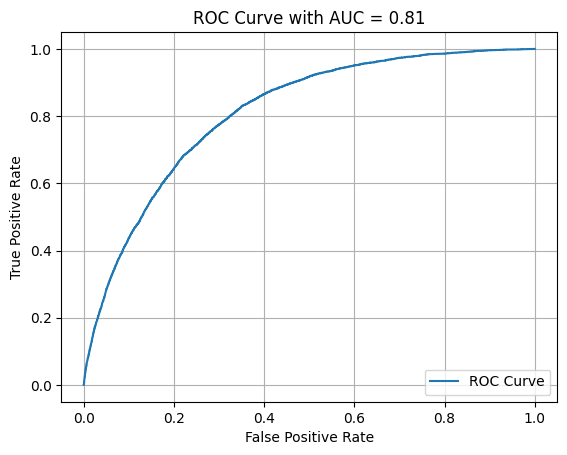

In [56]:
import matplotlib.pyplot 


y_proba_test = model12.predict(x_test).flatten()


fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## SVC

In [57]:
model3 = SVC(probability=True)

In [58]:
model3.fit(x_train,y_train)

SVC(probability=True)

In [59]:
ypred_train14 = model3.predict(x_train)
y_pred_test14 = model3.predict(x_test)


print(classification_report(y_train,ypred_train14))
print(classification_report(y_test,y_pred_test14))

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93    102339
         1.0       0.64      0.05      0.09     16035

    accuracy                           0.87    118374
   macro avg       0.76      0.52      0.51    118374
weighted avg       0.84      0.87      0.82    118374

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93     34073
         1.0       0.62      0.05      0.09      5386

    accuracy                           0.87     39459
   macro avg       0.75      0.52      0.51     39459
weighted avg       0.84      0.87      0.81     39459



In [60]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [61]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [62]:
grid.fit(x_train,y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.866 total time= 3.5min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.866 total time= 7.7min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.867 total time= 4.6min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.867 total time= 3.5min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.865 total time= 3.5min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.865 total time= 1.8min
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.865 total time= 1.8min
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.865 total time= 1.8min
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.865 total time= 1.8min
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.865 total time= 1.9min
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.865 total time= 1.3min
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [ ]:
grid.best_params_

In [ ]:
grid.best_estimator_

In [ ]:
ypred_train = grid.predict(x_train)
y_pred_test = grid.predict(x_test)

print(classification_report(y_train,ypred_train))
print(classification_report(y_test,y_pred_test))

In [ ]:



y_proba_test = grid.predict_proba(x_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Training Results

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93    102339
         1.0       0.66      0.04      0.07     16035

    accuracy                           0.87    118374
   macro avg       0.76      0.52      0.50    118374
weighted avg       0.84      0.87      0.81    118374

Testing Results

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93     34073
         1.0       0.64      0.04      0.07      5386

    accuracy                           0.87     39459
   macro avg       0.75      0.52      0.50     39459
weighted avg       0.84      0.87      0.81     39459



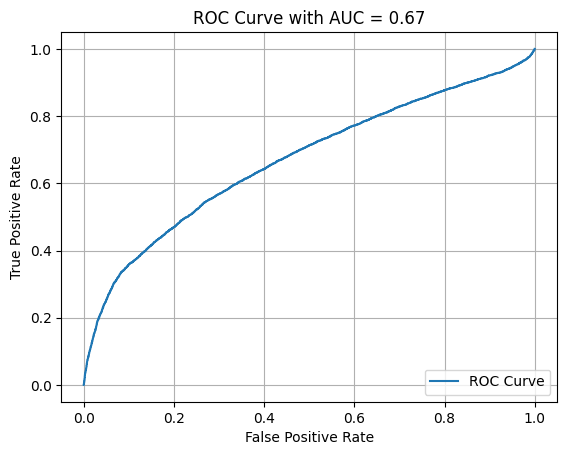

In [9]:

model3 = SVC(C=0.1, gamma=1, kernel='rbf', probability=True)
model3.fit(x_train, y_train)


ypred_train14 = model3.predict(x_train)
y_pred_test14 = model3.predict(x_test)


print("Training Results\n")
print(classification_report(y_train, ypred_train14))
print("Testing Results\n")
print(classification_report(y_test, y_pred_test14))


y_proba_test = model3.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()